# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2024-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

# <h1><center>Actividad 02: Extracción y Revisión de Datos</center></h1>

Esta actividad busca aplicar lo que acabamos de ver en clases sobre extracción de datos y conectarlo con la materia de "Tipos de Datos" que hemos visto en las clases pasadas.

## Instrucciones

Esto Notebook contiene las instrucciones a realizar para la actividad. 

<b>Al finalizarla, deben subir el Notebook y los archivos generados en un único archivo .zip, al módulo de la Actividad 02 en Canvas.</b>

Para esta actividad deben hacer lo siguiente:
<ol>
<li>Extraer datos</li>

Para esta actividad usaremos una base de datos de temblores que tiene la USGS (United States Geological Service) en https://www.usgs.gov/.

He preparado una base de datos con todos los temblores con magnitud mayor a 2.5, desde el 1ro de enero hasta el 23 de agosto de este año. La descripción de cada parámetro la pueden encontrar acá: https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php
    
Usando la librería `requests` descargue y guarde en un archivo en su repositorio local los datos que están disponibles en el siguiente URL:
    
`url='https://raw.githubusercontent.com/raxlab/imt2200-data/main/actividades/actividad%2002%202024/earthquakes_2024.json'`
    
<br>

<li>Formato</li>

¿En qué formato están los datos descargados? Identifique si son datos estructurados, semi-estructurados o no estructurados, explicando claramente por qué los categoriza así.
    
<br>
    
<li>DataFrame de análisis</li>

Usando los elementos que están bajo la categoría `features`, construya un DataFrame con los datos bajados y muestre las primeras 7 filas de datos de la tabla usando el método `.head()`.
    
<br>
    
<li>Preguntas</li>

Realice las dos siguientes actividades:

4.1 Profundidad:
    
Entre los tembroles que hay en la base, ¿Cuál fue el más profundo y qué profundidad tuvo? Sea claro en su respuesta.
    
4.2 Gráfico de intensidad:
    
Los temblores están medidos en diferfentes unidades a lo largo de los datos (puede ver la unidad en la columna `magType`), lo que no los hace a todos comparables. Elija un tipo de unidad (puede ser `me`, `mb`, `ml` u otro) y haga un gráfico mostrando la intensidad de cada temblor a lo largo del tiempo.
    
No olvide poner nombres a los ejes y en el título ponga las unidades elegidas y guarde la imagen con el nombre: `temblores_APELLIDO.jpg` donde reemplace `APELLIDO` por su propio apellido.

El siguiente es un ejemplo usando las unidades `mw` con datos de 2023, para que usen como guía (su gráfico no será igual), pero no es necesario que use las mismas unidades o que cambie los tipos de marcadores o líneas para que sean iguales a este ejemplo.
</ol>

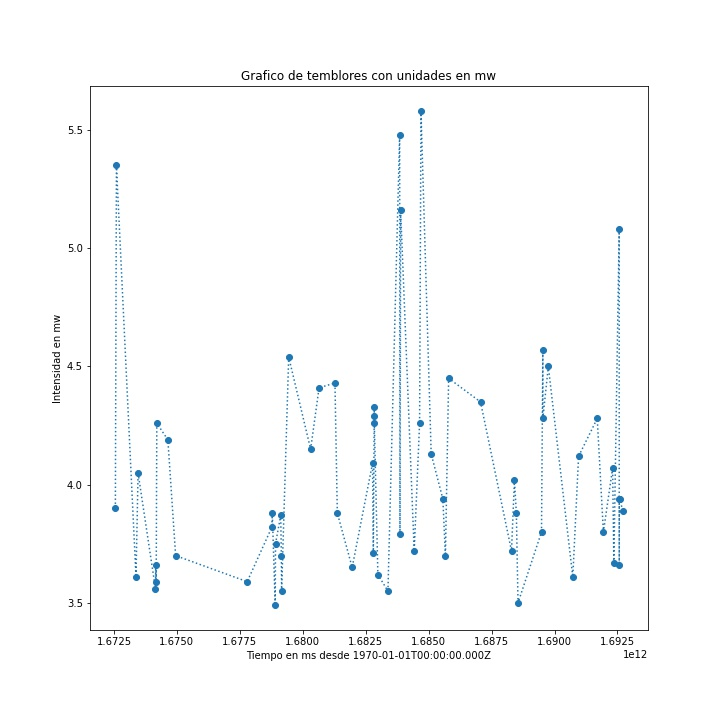

## Rúbrica

- Si han logrado los puntos 1 y 2: 3.0
- Si han logrado hasta el punto 3: 4.0
- Si han logrado hasta el punto 4, pero este último parcialmente: 5.0
- Si han logrado todo: 7.0

## 1. Extraer datos

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import requests
import json

In [2]:
# respuesta:
# lectura del sitio web
url='https://raw.githubusercontent.com/raxlab/imt2200-data/main/actividades/actividad%2002%202024/earthquakes_2024.json'
respuesta = requests.get(url)

In [3]:
# escribir los datos localmente
open('earthquakes.json','wb').write(respuesta.content)

10890487

In [4]:
# leer el archivo json
earthquakes = json.load(open('earthquakes.json','r', encoding='UTF-8'))
type(earthquakes)

dict

In [5]:
# llaves principales del archivo
earthquakes.keys()

dict_keys(['type', 'metadata', 'features', 'bbox'])

In [6]:
# primer elemento de 'features'
earthquakes['features'][0]

{'type': 'Feature',
 'properties': {'mag': 5.1,
  'place': '4 km NW of Bāramūla, India',
  'time': 1724116947386,
  'updated': 1724122389252,
  'tz': None,
  'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us7000n826',
  'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=us7000n826&format=geojson',
  'felt': 24,
  'cdi': 7.1,
  'mmi': None,
  'alert': None,
  'status': 'reviewed',
  'tsunami': 0,
  'sig': 417,
  'net': 'us',
  'code': '7000n826',
  'ids': ',us7000n826,',
  'sources': ',us,',
  'types': ',dyfi,origin,phase-data,',
  'nst': 86,
  'dmin': 1.051,
  'rms': 0.99,
  'gap': 84,
  'magType': 'mb',
  'type': 'earthquake',
  'title': 'M 5.1 - 4 km NW of Bāramūla, India'},
 'geometry': {'type': 'Point', 'coordinates': [74.317, 34.2404, 15.946]},
 'id': 'us7000n826'}

## 2. Formato

<b>Respuesta:</b>

Los datos son de tipo semi estructurado, al estar en un formato json con elementos anidados adentro de algunos de los campos.

## 3. DataFrame de Análisis

In [7]:
# respuesta:
df = pd.DataFrame(earthquakes['features'])
df.head(7)

,type,properties,geometry,id
0,Feature,"{'mag': 5.1, 'place': '4 km NW of Bāramūla, In...","{'type': 'Point', 'coordinates': [74.317, 34.2...",us7000n826
1,Feature,"{'mag': 5.1, 'place': '4 km W of Bāramūla, Ind...","{'type': 'Point', 'coordinates': [74.293, 34.2...",us7000n823
2,Feature,"{'mag': 2.61, 'place': '4 km SE of Larkfield-W...","{'type': 'Point', 'coordinates': [-122.7136688...",nc75050676
3,Feature,"{'mag': 3.7, 'place': '10 km E of Kırıkhan, Tu...","{'type': 'Point', 'coordinates': [36.4742, 36....",us7000n81t
4,Feature,"{'mag': 4.7, 'place': '6 km SW of Shiranuka, J...","{'type': 'Point', 'coordinates': [144.0315, 42...",us7000n81b
5,Feature,"{'mag': 2.5, 'place': '40 km WNW of Skwentna, ...","{'type': 'Point', 'coordinates': [-152.0943, 6...",ak024ao20309
6,Feature,"{'mag': 4.5, 'place': '144 km ESE of Petropavl...","{'type': 'Point', 'coordinates': [160.7352, 52...",us7000n813


In [8]:
earth_df = pd.json_normalize(earthquakes['features'], sep="_")
earth_df.head(7)

,type,id,properties_mag,properties_place,properties_time,properties_updated,properties_tz,properties_url,properties_detail,properties_felt,...,properties_types,properties_nst,properties_dmin,properties_rms,properties_gap,properties_magType,properties_type,properties_title,geometry_type,geometry_coordinates
0,Feature,us7000n826,5.10,"4 km NW of Bāramūla, India",1724116947386,1724122389252,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,24.0,...,",dyfi,origin,phase-data,",86.0,1.05100,0.99,84.0,mb,earthquake,"M 5.1 - 4 km NW of Bāramūla, India",Point,"[74.317, 34.2404, 15.946]"
1,Feature,us7000n823,5.10,"4 km W of Bāramūla, India",1724116555201,1724121489367,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,6.0,...,",dyfi,origin,phase-data,",81.0,1.02100,0.87,44.0,mb,earthquake,"M 5.1 - 4 km W of Bāramūla, India",Point,"[74.293, 34.2156, 11.568]"
2,Feature,nc75050676,2.61,"4 km SE of Larkfield-Wikiup, CA",1724115536550,1724122324041,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,263.0,...,",dyfi,focal-mechanism,nearby-cities,origin,pha...",57.0,0.09026,0.10,66.0,md,earthquake,"M 2.6 - 4 km SE of Larkfield-Wikiup, CA",Point,"[-122.713668823242, 38.4908332824707, 6.289999..."
3,Feature,us7000n81t,3.70,"10 km E of Kırıkhan, Turkey",1724115462110,1724116367040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",moment-tensor,origin,phase-data,",31.0,0.78000,0.80,52.0,mwr,earthquake,"M 3.7 - 10 km E of Kırıkhan, Turkey",Point,"[36.4742, 36.4913, 10]"
4,Feature,us7000n81b,4.70,"6 km SW of Shiranuka, Japan",1724108532886,1724109834040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",75.0,1.11200,0.47,124.0,mb,earthquake,"M 4.7 - 6 km SW of Shiranuka, Japan",Point,"[144.0315, 42.9196, 122.386]"
5,Feature,ak024ao20309,2.50,"40 km WNW of Skwentna, Alaska",1724107067568,1724114240040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",NaN,NaN,0.59,NaN,ml,earthquake,"M 2.5 - 40 km WNW of Skwentna, Alaska",Point,"[-152.0943, 62.1526, 101.6]"
6,Feature,us7000n813,4.50,"144 km ESE of Petropavlovsk-Kamchatsky, Russia",1724106187427,1724112570040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",45.0,1.28300,1.00,177.0,mb,earthquake,M 4.5 - 144 km ESE of Petropavlovsk-Kamchatsky...,Point,"[160.7352, 52.7994, 23.712]"


## 4. Preguntas

### 4.1 Profundidad

Los datos de profundidad se encuentran en el tercer elemento adentro del `key` llamado `coordinates` que está adentro del `key` llamado `geometry`. Una forma simple de acceder es transformar la columna `coordinates` a una lista de listas usando el comando `.values.tolist()` y luego crear un DataFrame con las listas obtenidas con el comando `pd.DataFrame(<data>, columns = ['lat', 'long', 'deep'])`. Con eso la columna `deep` tendrá la profundidad de cada evento, que si desean pueden agregar al DataFrame original.

In [9]:
# respuesta:

# obtener las coordenadas
coord = earth_df['geometry_coordinates'].values.tolist()
coord_df = pd.DataFrame(coord, columns = ['lat', 'long', 'deep'])
coord_df

,lat,long,deep
0,74.317000,34.240400,15.946
1,74.293000,34.215600,11.568
2,-122.713669,38.490833,6.290
3,36.474200,36.491300,10.000
4,144.031500,42.919600,122.386
...,...,...,...
15241,-70.517500,-25.343600,35.000
15242,107.122400,-6.859900,178.051
15243,-25.896700,-57.304500,55.881
15244,145.459600,17.662500,384.941


In [10]:
# agregar como columnas
earth_df['deep'] = coord_df['deep']
earth_df

,type,id,properties_mag,properties_place,properties_time,properties_updated,properties_tz,properties_url,properties_detail,properties_felt,...,properties_nst,properties_dmin,properties_rms,properties_gap,properties_magType,properties_type,properties_title,geometry_type,geometry_coordinates,deep
0,Feature,us7000n826,5.10,"4 km NW of Bāramūla, India",1724116947386,1724122389252,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,24.0,...,86.0,1.05100,0.99,84.0,mb,earthquake,"M 5.1 - 4 km NW of Bāramūla, India",Point,"[74.317, 34.2404, 15.946]",15.946
1,Feature,us7000n823,5.10,"4 km W of Bāramūla, India",1724116555201,1724121489367,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,6.0,...,81.0,1.02100,0.87,44.0,mb,earthquake,"M 5.1 - 4 km W of Bāramūla, India",Point,"[74.293, 34.2156, 11.568]",11.568
2,Feature,nc75050676,2.61,"4 km SE of Larkfield-Wikiup, CA",1724115536550,1724122324041,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,263.0,...,57.0,0.09026,0.10,66.0,md,earthquake,"M 2.6 - 4 km SE of Larkfield-Wikiup, CA",Point,"[-122.713668823242, 38.4908332824707, 6.289999...",6.290
3,Feature,us7000n81t,3.70,"10 km E of Kırıkhan, Turkey",1724115462110,1724116367040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,31.0,0.78000,0.80,52.0,mwr,earthquake,"M 3.7 - 10 km E of Kırıkhan, Turkey",Point,"[36.4742, 36.4913, 10]",10.000
4,Feature,us7000n81b,4.70,"6 km SW of Shiranuka, Japan",1724108532886,1724109834040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,75.0,1.11200,0.47,124.0,mb,earthquake,"M 4.7 - 6 km SW of Shiranuka, Japan",Point,"[144.0315, 42.9196, 122.386]",122.386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15241,Feature,us6000m0wa,4.30,"7 km NNW of Taltal, Chile",1704071125000,1710020290040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,19.0,0.80400,0.62,178.0,mb,earthquake,"M 4.3 - 7 km NNW of Taltal, Chile",Point,"[-70.5175, -25.3436, 35]",35.000
15242,Feature,us6000m0wb,4.10,"4 km SSW of Cianjur, Indonesia",1704070759656,1710020291040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,43.0,0.49000,0.67,97.0,mb,earthquake,"M 4.1 - 4 km SSW of Cianjur, Indonesia",Point,"[107.1224, -6.8599, 178.051]",178.051
15243,Feature,us6000m357,4.40,South Sandwich Islands region,1704070484947,1710020415040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,18.0,6.69400,0.54,107.0,mb,earthquake,M 4.4 - South Sandwich Islands region,Point,"[-25.8967, -57.3045, 55.881]",55.881
15244,Feature,us6000m0w6,4.70,"272 km N of Saipan, Northern Mariana Islands",1704069429096,1710020289040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,198.0,2.42900,0.50,36.0,mb,earthquake,"M 4.7 - 272 km N of Saipan, Northern Mariana I...",Point,"[145.4596, 17.6625, 384.941]",384.941


In [11]:
max_depth = earth_df["deep"].max()
print(f'La máxima profundidad fue de {max_depth} mts.')

max_depth_idx = earth_df["deep"].idxmax()
max_depth_idx
print('El evento con mayor profundidad fue:')
earth_df.iloc[[max_depth_idx]]

La máxima profundidad fue de 671.043 mts.
El evento con mayor profundidad fue:


,type,id,properties_mag,properties_place,properties_time,properties_updated,properties_tz,properties_url,properties_detail,properties_felt,...,properties_nst,properties_dmin,properties_rms,properties_gap,properties_magType,properties_type,properties_title,geometry_type,geometry_coordinates,deep
10287,Feature,us6000mivr,4.2,Fiji region,1709937743713,1715794502040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,16.0,3.071,0.29,83.0,mb,earthquake,M 4.2 - Fiji region,Point,"[-177.8158, -19.3114, 671.043]",671.043


### 4.2 Grafico

Importante notar que el elemento `time` de cada medición está en milisegundos desde `1970-01-01T00:00:00.000Z`. No es necesario que transforme ese valor en una fecha, sólo use el tiempo directamente para el eje X de su gráfico. Ya aprenderemos a transformar este tipo de datos en otro formato.

In [12]:
# respuesta:
unit = 'mw'
earth_df_unit = earth_df[earth_df['properties_magType']==unit]
earth_df_unit.head()

,type,id,properties_mag,properties_place,properties_time,properties_updated,properties_tz,properties_url,properties_detail,properties_felt,...,properties_nst,properties_dmin,properties_rms,properties_gap,properties_magType,properties_type,properties_title,geometry_type,geometry_coordinates,deep
160,Feature,ci40703159,3.61,"6 km NW of Lakeland Village, CA",1723739971860,1723915593291,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,3875.0,...,158.0,0.03404,0.26,33.0,mw,earthquake,"M 3.6 - 6 km NW of Lakeland Village, CA",Point,"[-117.3981667, 33.674, 8.38]",8.38
273,Feature,ci40699207,4.39,"4 km SSE of Highland Park, CA",1723490424670,1724115115908,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,24209.0,...,192.0,0.03299,0.24,24.0,mw,earthquake,"M 4.4 - 4 km SSE of Highland Park, CA",Point,"[-118.1788333, 34.0825, 10.98]",10.98
316,Feature,ci40697215,3.66,"20 km E of Little Lake, CA",1723369513490,1723494167662,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,8.0,...,32.0,0.02461,0.14,71.0,mw,earthquake,"M 3.7 - 20 km E of Little Lake, CA",Point,"[-117.6805, 35.945, 5]",5.00
443,Feature,ci40869232,4.44,"22 km NW of Grapevine, CA",1723082955010,1723498471540,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,760.0,...,99.0,0.04425,0.28,21.0,mw,earthquake,"M 4.4 - 22 km NW of Grapevine, CA",Point,"[-119.0726667, 35.102, 11.57]",11.57
448,Feature,ci40868904,3.78,"25 km NW of Grapevine, CA",1723074212720,1723498440931,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,334.0,...,68.0,0.05153,0.23,42.0,mw,earthquake,"M 3.8 - 25 km NW of Grapevine, CA",Point,"[-119.1181667, 35.1018333, 12.24]",12.24


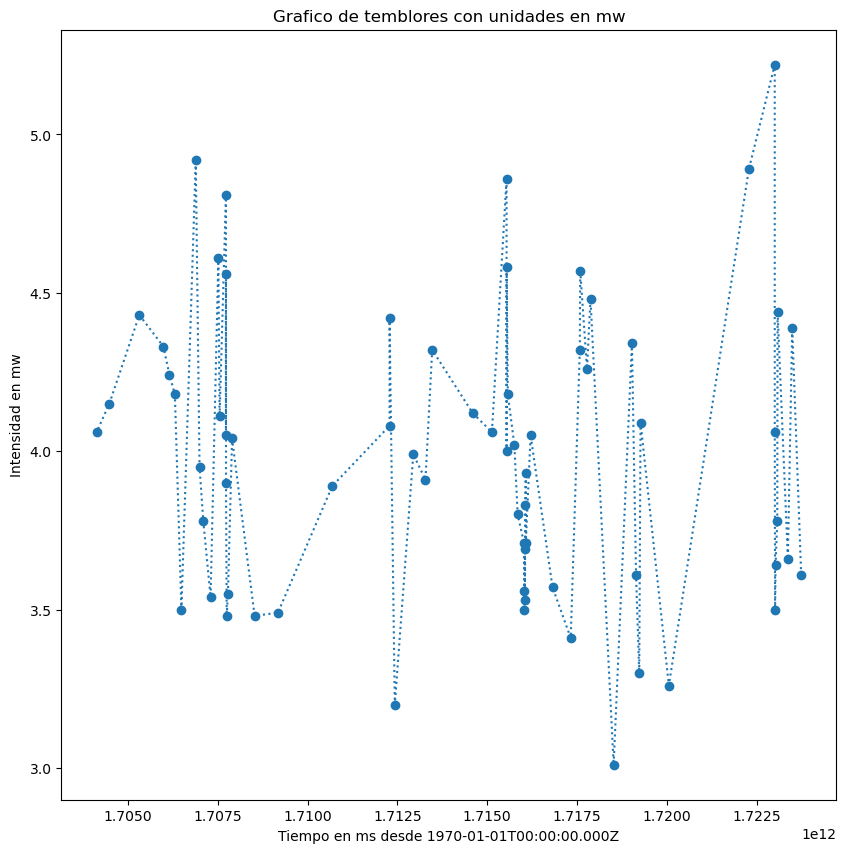

In [13]:
fig = plt.figure(figsize=(10,10))
plt.plot(earth_df_unit['properties_time'], earth_df_unit['properties_mag'], 'o:')
plt.title('Grafico de temblores con unidades en ' + unit)
plt.xlabel('Tiempo en ms desde 1970-01-01T00:00:00.000Z')
plt.ylabel('Intensidad en ' + unit)
plt.show()

In [14]:
fig.savefig('temblores_XXXX.jpg')